# Bangalore House Price Prediction

In [1]:
# Following is whole procedure from data extraction to feature engineering and to the model building of our proposed project.
# After the completion of machine learning approach to our model, We have used pycharm for model deployment in which 
#flask is used for site building, bootstrap for designing, little java script to display the info in same page and not on another page.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
B=pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
B.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
# Stages to Prediction:
#1. Data ccleaning
#2. EDA
#3. Model building
#4. Evaluation
#5. Improvemnet
#6. Website
#7. Deployment

In [5]:
#prices in lakhs

###### lets take a look at them visually

In [103]:
B_corr=B.corr(method="pearson")

In [104]:
B_corr

,total_sqft,bath,price,bhk
total_sqft,1.000000,0.705036,0.828845,0.669379
bath,0.705036,1.000000,0.604318,0.848875
price,0.828845,0.604318,1.000000,0.544891
bhk,0.669379,0.848875,0.544891,1.000000


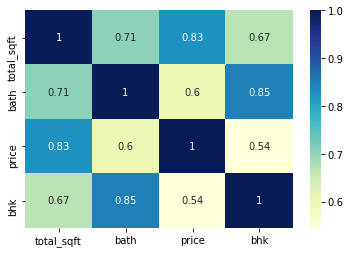

In [107]:
ataplot = sns.heatmap(B_corr, cmap="YlGnBu", annot=True)

###### Not so higly correlated with each other, so these columns can be taken into further process

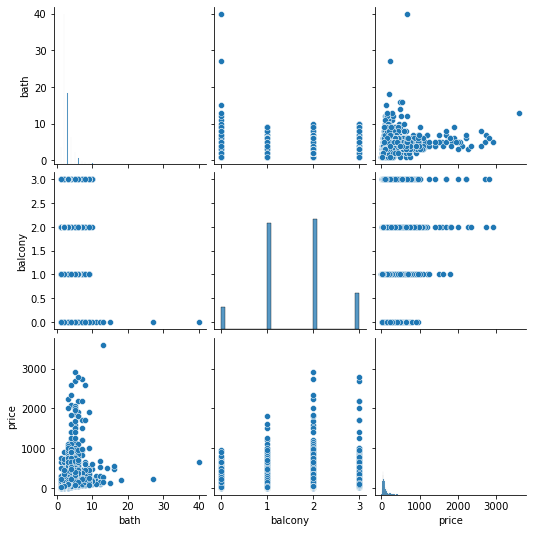

In [7]:
sns.pairplot(B);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


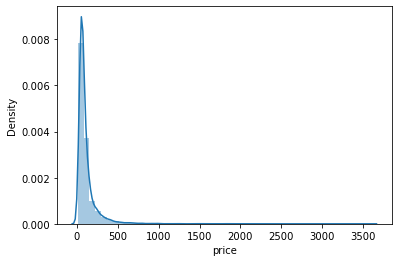

In [6]:
sns.distplot(B['price']);

In [ ]:
# as we can it is skewed right side

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

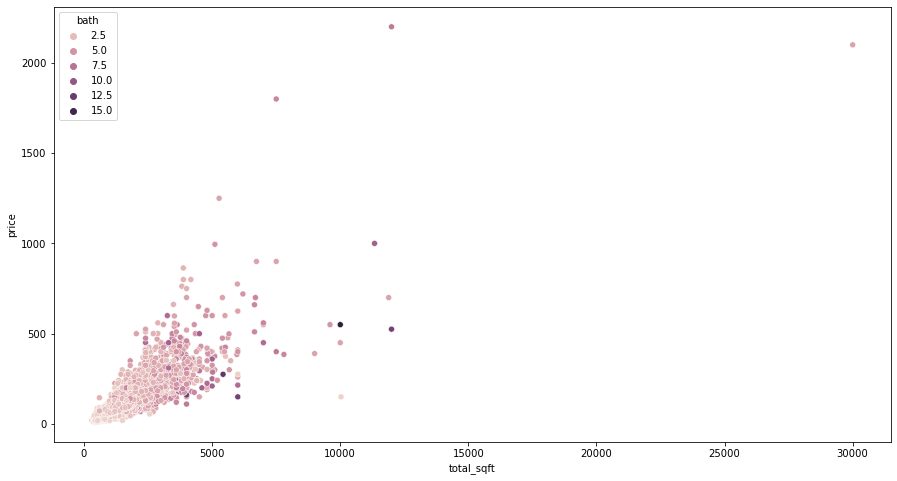

In [118]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="total_sqft",y="price",hue='bath',data=B)

###### we can cleary see some notorious outliers

In [6]:
B.shape                                # 13320 rows in our data

(13320, 9)

In [8]:
# that means for every attribute in our data there should be 13320 values

In [9]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
# we have 6 columns with object datatypes and 3 with float data types and above info shows how many not null values we havve in our dataset
#society has many null values as we have only 7818 not null values out of total 13320 row values ( rowvalues =total values of that column)
#there are also some other columns where we have null values like size,bath,balcony

In [11]:
for column in B.columns:                                                               #applying a for loop here and storing columns of B in column and that becomes column of B now
    print(B[column].value_counts())                                                   #and counting the value of column stored in new B[column]
    print('*'*20)                                                                     # for spacing in between all the column information , we have separated each outputs with star 20 times

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
********************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Nov               1
14-Nov               1
14-Jul               1
15-Aug               1
17-Jan               1
Name: availability, Length: 81, dtype: int64
********************
Whitefield                       540
Sarjapur  Road                   399
Electronic City                  302
Kanakpura Road                   273
Thanisandra                      234
                                ... 
Subramanyanagar                    1
Chikka Gowdanapalya.               1
JakkurYelahanka                    1
Gubbi Cross, Hennur Main Road      1
Keerthi Layout                     1
Name: location, Length: 1305, dtype: int64
********************
2 BHK         5199
3 BHK         4310
4 Bed

In [12]:
#conclusion from data

In [13]:
# so if we read it as data then we have this much values of that name in our column
# IF we read it carefully we'll find that in banglore we have 8790 superbuilt up area, 2418 built-up area and so on
#in total_sqft we want values not range so wherever we'll get range we'll replace it with mean

In [14]:
B.isnull().sum()                                                                   #B.isna().sum()??,,what is the meaning of this syntax

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [15]:
B.drop(['area_type','availability','society','balcony'],inplace=True,axis=1)

In [16]:
B.describe()                                                                     # applies to column those have numeric values cz it's shows statistical analysis

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [17]:
#dropping null values

In [18]:
# dropping areatype, availability, society, balcony - why? 
# they are not going to help us in our predictions 5:52
#although we can include these after removing null values and giving extra infor. to algo. with labelencoding

In [19]:
# analysing: as we only have two columns in numeric data so,
# 1stquartile in bathroom is 2, median is 2, and 3rd quartile 3
# analysing it properly 7:03

In [20]:
B.info()                          #after removing the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


###### Filling or removing null values

In [21]:
# now we have options either to remove null values or fill up the missing values

In [22]:
B['location'].value_counts()                                                       # only one missing value so we can fill it with any same value of another cell

Whitefield                       540
Sarjapur  Road                   399
Electronic City                  302
Kanakpura Road                   273
Thanisandra                      234
                                ... 
Subramanyanagar                    1
Chikka Gowdanapalya.               1
JakkurYelahanka                    1
Gubbi Cross, Hennur Main Road      1
Keerthi Layout                     1
Name: location, Length: 1305, dtype: int64

In [23]:
B['location']=B['location'].fillna('Sarjapur  Road')

In [24]:
B['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
12 Bedroom       1
16 BHK           1
14 BHK           1
19 BHK           1
13 BHK           1
43 Bedroom       1
27 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [25]:
# as the total missing values are only 16, not gonna make much of a differnece and as 2 BHK has max values, so we'll replace it with that

In [26]:
B['size']=B['size'].fillna('2 BHK')                                              # cz 2 BHK is appearing alot times so

In [27]:
B['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
14.0       1
40.0       1
18.0       1
27.0       1
15.0       1
Name: bath, dtype: int64

In [28]:
# 'bath' is a numeric column so we'll replace its null values with its median

In [29]:
B['bath']=B['bath'].fillna(B['bath'].median())                                    # so if we see inside the bracket first we find median of 'bath' and then we fill null values with that media  #this says that in original column of bath we are filling the null values with the median value of bath

In [119]:
B.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9150 entries, 0 to 10300
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    9150 non-null   object 
 1   total_sqft  9150 non-null   float64
 2   bath        9150 non-null   float64
 3   price       9150 non-null   float64
 4   bhk         9150 non-null   int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 393.2+ KB


###### Problem 1

In [ ]:
B['bhk']=B['size'].str.split().str.get(0).astype(int)                                  #first we split the string from it's space element and then we get it's 0th element and what's left is string so applied astype and stored the whole output into new variable which is our new column

In [33]:
B[B.bhk>20]                                                                      #then from that new variable we are checking which one have more 20bhk  

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [34]:
# above are outliers in our data

In [35]:
B

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


###### Problem 2: Some values contain ranges 

In [36]:
B['total_sqft'].unique()                                                            # this column contain some unique values in range format, etc so that's why it has shown as object datatype, so we will split them and mean of this integer values 

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [37]:
def convertrange(x):                                                            #so we are going to make a function which will store those values
    temp=x.split('-')                                                           # and split them in separete strings and store them in temp
    if len(temp)==2:                                                            # so if length of temp is 1 that is it is one string and 2 i.e contains 2 string
        return(float(temp[0])+float(temp[1]))/2                                  #no we are going to return an O/P as a mean of float datatype of both the values at their resp. positions
    try:                                                                         #we are saying either return the values as float and if it contains any nullvalue 
        return float(x)                                                          # try returning none
    except:
        return None

In [38]:
B['total_sqft']=B['total_sqft'].apply(convertrange)                             #'apply' function-you pass a refrence of a funtion in this    #so now we are applying convertrange function on total sqft column so that will be our input as x and saving that in its column# so x goes in convertrange and that is applied into our column 

In [39]:
B.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [40]:
# the extracted values from size column is in 'bhk'

In [41]:
# Price per sq feet: a new column, , will help in removing values

In [42]:
B['Price_per_sqfeet']=B['price']*100000/B['total_sqft']                              #making a new column  # we have multiplied wiht 1 lkh so as to remove the decimal from our value

In [43]:
B['Price_per_sqfeet']                                                              # unit of this will be?

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: Price_per_sqfeet, Length: 13320, dtype: float64

In [44]:
B.describe()

,total_sqft,bath,price,bhk,Price_per_sqfeet
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [46]:
B['location'].value_counts()

Whitefield                       540
Sarjapur  Road                   400
Electronic City                  302
Kanakpura Road                   273
Thanisandra                      234
                                ... 
Subramanyanagar                    1
Chikka Gowdanapalya.               1
JakkurYelahanka                    1
Gubbi Cross, Hennur Main Road      1
Keerthi Layout                     1
Name: location, Length: 1305, dtype: int64

In [47]:
# so now we have 1305 values in our location column and we won't be able to apply one hot encoding(?) there and won;t be able to put it in our modeling so what we'll do that wherever we have values less than 10 we are going to name it others 

In [49]:
B['location']=B['location'].apply(lambda x: x.strip())                           # so the whitespace around the strings were creating problem so we are stripping our strings and using it as x and applying lamba funciton and saving it back to the column itself
location_count=B['location'].value_counts()                                       #so now we made a new variable and saved the value counts of our column into it after stripping off the values

In [50]:
location_count

Whitefield                         541
Sarjapur  Road                     400
Electronic City                    304
Kanakpura Road                     273
Thanisandra                        237
                                  ... 
Ganganahalli                         1
Vidyapeeta                           1
Achins Road                          1
4 Bedroom Farm House in Bagalur      1
Keerthi Layout                       1
Name: location, Length: 1294, dtype: int64

In [51]:
location_count_less_10=location_count[location_count<=10]                          # so now we find those locations in our newly assigned variable where the location is less than 10 and we are saving it in new variable
location_count_less_10

Sadashiva Nagar                    10
Dairy Circle                       10
Kalkere                            10
1st Block Koramangala              10
Gunjur Palya                       10
                                   ..
Ganganahalli                        1
Vidyapeeta                          1
Achins Road                         1
4 Bedroom Farm House in Bagalur     1
Keerthi Layout                      1
Name: location, Length: 1053, dtype: int64

In [52]:
B['location']=B['location'].apply(lambda x:'other' if x in location_count_less_10 else x)     #so now we have applied a lamba function in our location column saying if you find a column location_count_less_tan 10 then put it others else put it x 

In [53]:
B['location'].value_counts()

other                        2885
Whitefield                    541
Sarjapur  Road                400
Electronic City               304
Kanakpura Road                273
                             ... 
Marsur                         11
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
HAL 2nd Stage                  11
Narayanapura                   11
Name: location, Length: 242, dtype: int64

In [54]:
# now we have 'other' value separeted and while one hot encoding only 242 columns will be there

###### Outlier detection and removal 

In [55]:
B.describe()

,total_sqft,bath,price,bhk,Price_per_sqfeet
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [56]:
# so this is strange that there is a home with 1sqft area, so that's an outlier, so we are going to see how many totalsqft per bhk( how many sqft should be there in single bhk) 

In [57]:
(B['total_sqft']/B['bhk']).describe()                                          

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [58]:
# so when we did this we found there is a home which is of 0.25 sqft so we'll filter those flat which has less than 300 sqft as there bhk area

In [59]:
B=B[((B['total_sqft']/B['bhk'])>=300)]                                              # so what we did we applied filter to above code and said whichever is more than 300 we'll keep it in our original column

In [60]:
B.describe()

,total_sqft,bath,price,bhk,Price_per_sqfeet
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [61]:
# so now our minimum value for sqft is 300

In [62]:
B.shape

(12530, 7)

In [63]:
B.Price_per_sqfeet.describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqfeet, dtype: float64

In [64]:
# the max is an outlier so

In [65]:
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.Price_per_sqfeet)
        
        st=np.std(subdf.Price_per_sqfeet)
        
        gen_df=subdf[(subdf.Price_per_sqfeet>(m-st))&(subdf.Price_per_sqfeet<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
B=remove_outliers_sqft(B)
B.describe()

,total_sqft,bath,price,bhk,Price_per_sqfeet
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [66]:
def bhk_outlier_remover(df):                              #bhk outlier removal
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.Price_per_sqfeet),
                'std':np.mean(bhk_df.Price_per_sqfeet),
                'count':bhk_df.shape[0]
            }
    for bhk,bhk_df in location_df.groupby('bhk'):
        stats=bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
            exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.Price_per_sqfeet<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')



In [67]:
B=bhk_outlier_remover(B)

In [68]:
B.shape

(9150, 7)

In [69]:
B

,location,size,total_sqft,bath,price,bhk,Price_per_sqfeet
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [70]:
B.drop(columns=['size','Price_per_sqfeet'],inplace=True)

###### Cleaned data

In [72]:
B.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [73]:
B.to_csv('B_Cleaned.csv')                                     

In [74]:
x_ind=B.drop(['price'],axis=1)

In [75]:
y_dep=B['price']

###### importing necessary libraries

In [76]:
!pip install pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=0)

In [78]:
print(x_train.shape)
print(x_test.shape)

(7320, 4)
(1830, 4)


###### Applying linear regression

In [80]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [81]:
scaler=StandardScaler()

In [82]:
lr=LinearRegression(normalize=True)

In [83]:
pipe=make_pipeline(column_trans,scaler,lr)

In [84]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [85]:
y_pred_lr=pipe.predict(x_test)

In [86]:
r2_score(y_test,y_pred_lr)

0.8255049534325904

###### Regularisation
###### Lasso

In [88]:
Lasso=Lasso()

In [89]:
pipe=make_pipeline(column_trans,scaler,Lasso)

In [90]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [91]:
y_pred_lasso=pipe.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.8194933436866532

###### Applying Ridge

In [93]:
ridge=Ridge()

In [94]:
pipe=make_pipeline(column_trans,scaler,ridge)

In [95]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [96]:
y_pred_ridge=pipe.predict(x_test)
r2_score(y_test,y_pred_ridge)

0.8255126798271092

In [97]:
print('No Regularisation:',r2_score(y_test,y_pred_lr))
print('Lasso:',r2_score(y_test,y_pred_lasso))
print('Ridge:',r2_score(y_test,y_pred_ridge))

No Regularisation: 0.8255049534325904
Lasso: 0.8194933436866532
Ridge: 0.8255126798271092


In [98]:
# since Linear regression and Ridge are giving approx same result we are gonna dump the Ridge one

In [99]:
import pickle

In [100]:
pickle.dump(pipe,open('RidgeModel.pkl','wb'))

In [101]:
B.shape

(9150, 5)

###### Conclusion of the Analysis

In [ ]:
# First we started with 13320 rows of data with 9 columns of variables. After removal of non responsive variables and the ouliers in the data we were with 9150 rows of data and 7 columns and now after performing different models and regularisation techniques, we are left with 9150 rows and 5 columns of data.
# The analysis showed a lot of mismathcing on data with respect to the columns. Like size of the flats with unappropriate numbers of bathroom and balcony.
# Surely being an outlier, they had to go away.
# After the EDA of the dataframe when we started modeling, we found that applying linear regression was a good decision as it was giving a good score of rsquare. We did try to improve the model with some regularisation techniques in which only Ridge was the one that came near to Linear regression approch.
# With the good analysis of the data we are surely going to move to deployment frame as it is going to be a game changer for the newbies trying to find a "Makaan" in the Silicon Valley of India.